In [1]:
import pandas as pd 
import numpy as np
import json
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import sys
sys.path.append("..") 
import descriptors.preprocessing as pp
import descriptors.dft_featurisation as dft_ft
import descriptors.rdkit_featurisation as rdkit_ft
from analysis import analysis_train_set_size, random_split, stratified_split 
import matplotlib as mpl

# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline 

In [2]:
df_dft = pd.read_csv("../data/NiCOlit.csv", sep = ',')
df_dft, indexes = pp.preprocess(df_dft)
indexes_dft = []
for idx in df_dft.index:
    indexes_dft.append(idx)
df_dft = df_dft.reset_index(drop=True)

In [3]:
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, substrate_dft, ligand_dft = dft_ft.process_dataframe_dft(df_dft, data_path="../data/utils/", origin=False)

In [4]:
regressor = RandomForestRegressor()
param_grid = { 
    'n_estimators': [50, 100, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8, None],
    'min_samples_split': [2, 3, 4]
}

predictor = GridSearchCV(regressor, param_grid)
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, predictor=predictor,
                                                                                                              n_iterations=10)
display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])
display_df.to_csv("../results/random_split_dft_descriptors_test_size_0.2_grid_search")

In [5]:
regressor = MLPRegressor()
param_grid = { 
    'hidden_layer_sizes': [(100,), (100, 100,), (100, 100, 50,)],
    'alpha': [0.0001, 0.001, 0.01],
}

predictor = GridSearchCV(regressor, param_grid)
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, predictor=predictor,
                                                                                                              n_iterations=10)
display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])
display_df.to_csv("../results/random_split_dft_descriptors_test_size_0.2_grid_search_nn")

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

In [6]:
from sklearn.svm import SVR

regressor = SVR()
param_grid = { 
    'gamma' : ['scale', 'auto'], 
    'C': [1, 0.5, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

predictor = GridSearchCV(regressor, param_grid)
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, predictor=predictor,
                                                                                                              n_iterations=10)
display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])
display_df.to_csv("../results/random_split_dft_descriptors_test_size_0.2_grid_search_svr")

# Visualization

In [7]:
df_1 = pd.read_csv('../results/random_split_dft_descriptors_test_size_0.2_grid_search')
df_2 = pd.read_csv('../results/random_split_dft_descriptors_test_size_0.2_grid_search_nn')
df_3 = pd.read_csv('../results/random_split_dft_descriptors_test_size_0.2_grid_search_svr')

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


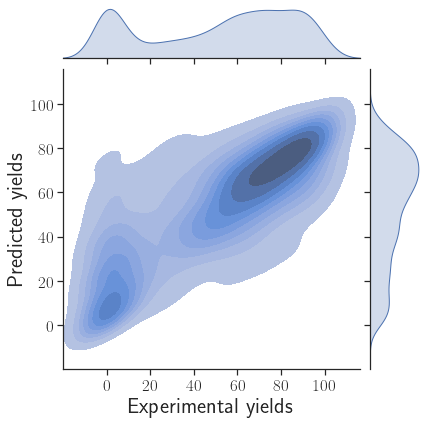

In [8]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])

h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
y_0, y_1 = h.ax_joint.get_ylim()
h.ax_joint.set_xlim(y_0, y_1)
fig_path = '../images/random_split_dft_descriptors_test_size_0.2_grid_search.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


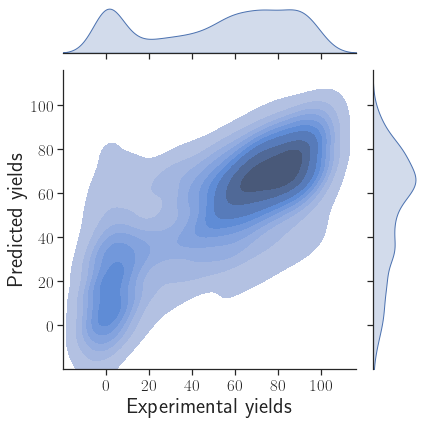

In [10]:
h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
h.ax_joint.set_xlim(y_0, y_1)
h.ax_joint.set_ylim(y_0, y_1)
fig_path = '../images/random_split_dft_descriptors_test_size_0.2_grid_search_nn.png'
plt.tight_layout() 
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


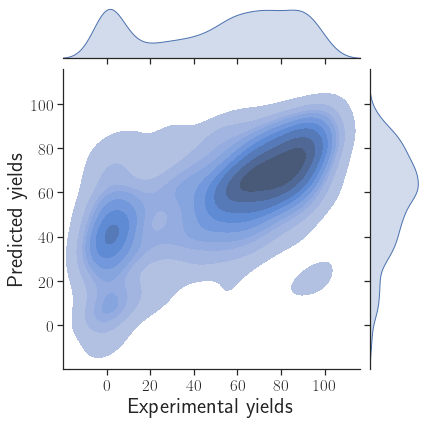

In [11]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
h.ax_joint.set_xlim(y_0, y_1)
h.ax_joint.set_ylim(y_0, y_1)
fig_path = '../images/random_split_dft_descriptors_test_size_0.2_grid_search_svr.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [12]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_grid_search.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_grid_search_nn.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_grid_search_svr.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

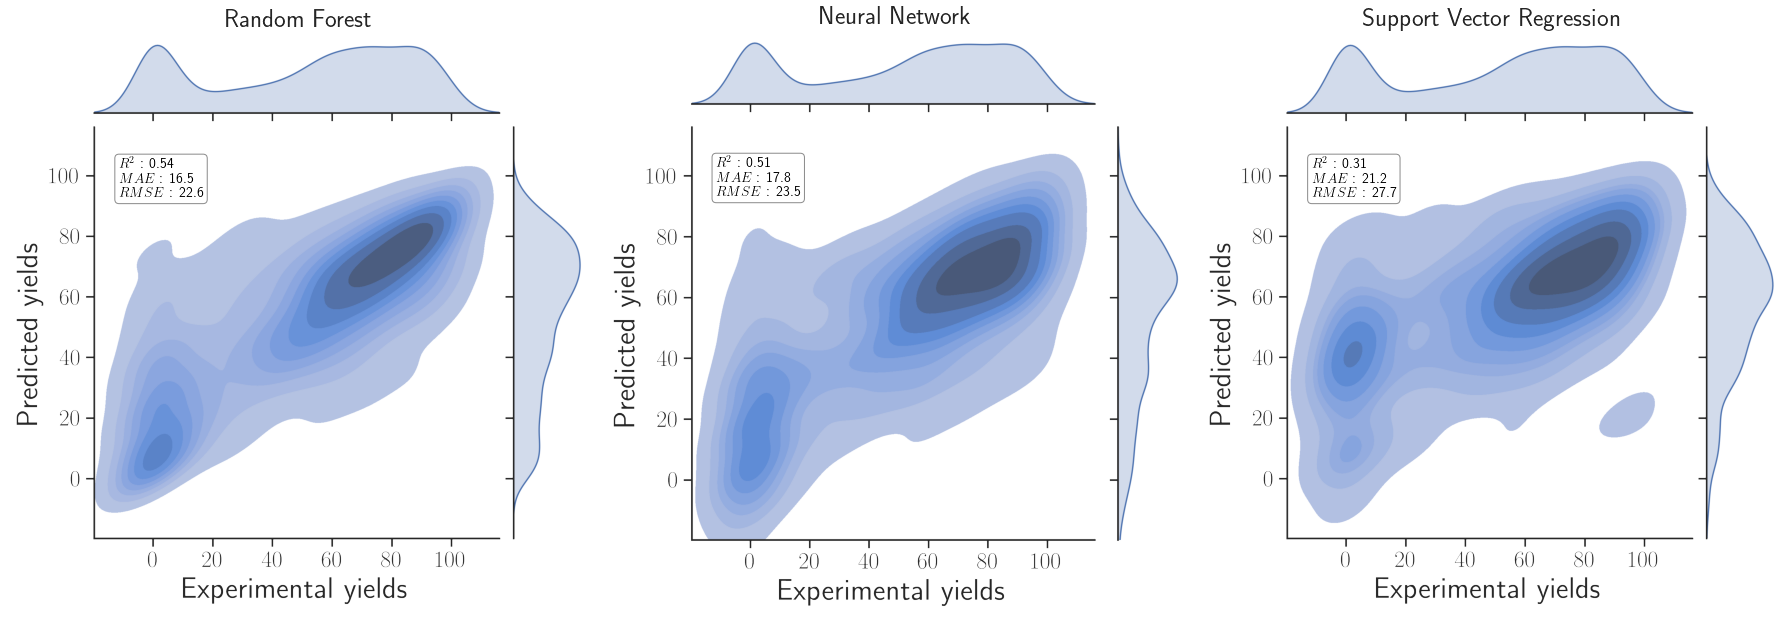

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["Random Forest", "Neural Network", "Support Vector Regression",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()    
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', 
                   size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
plt.tight_layout()    
plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_grid_search_full.png', dpi=300, bbox_inches='tight')